# Implementation of Decision & Hyper-tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
data.describe()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,...,2.206700e+04,2.206700e+04,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000
mean,15115.161372,2547.069334,47.931345,0.391807,0.377487,0.772420,800.318575,2.211991,874.440975,66.934790,...,7.222013e+03,7.181977e+03,6694.966494,3.943065e+03,3.781366e+03,4.070565e+03,3.720333e+03,7.165418e+03,7.182148e+03,0.193683
std,8737.384035,1598.675520,16.393352,0.488165,1.044629,1.033849,431.454448,0.669556,904.244526,84.133427,...,2.105071e+04,1.927121e+04,17101.802052,8.661750e+04,3.254151e+04,5.726446e+04,2.517514e+04,1.959007e+04,2.097682e+04,0.395192
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7522.500000,1321.000000,36.000000,0.000000,0.000000,0.000000,409.000000,2.000000,159.000000,11.000000,...,1.906485e+03,2.209835e+03,1817.980000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029970e+03,2.090665e+03,0.000000
50%,15120.000000,2202.000000,46.000000,0.000000,0.000000,0.000000,848.000000,2.000000,531.000000,28.000000,...,3.426740e+03,3.592880e+03,3380.690000,1.130000e+00,6.440000e+00,2.147300e+02,2.285000e+02,3.501740e+03,3.508160e+03,0.000000
75%,22685.500000,3370.000000,60.000000,1.000000,0.000000,2.000000,1096.000000,3.000000,1374.000000,90.000000,...,6.826095e+03,6.819235e+03,6628.750000,9.937800e+02,1.129115e+03,1.579220e+03,1.643175e+03,6.858385e+03,6.779355e+03,0.000000
max,30301.000000,11353.000000,90.000000,1.000000,52.000000,4.000000,1649.000000,3.000000,4782.000000,365.000000,...,1.001124e+06,1.192704e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.074625e+06,1.326487e+06,1.000000


Separate the independent & dependent variables.

In [5]:
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

## Scalling the dataset.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Splitting the dataset.

In [7]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17653, 19)
(4414, 19)
(17653,)
(4414,)


In [8]:
y_train

3578     0
15780    1
11275    0
17021    1
1337     0
        ..
19851    1
8277     0
9190     0
6861     1
1384     0
Name: churn, Length: 17653, dtype: int64

# Model building & predictions.

In [9]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight = 'balanced')  # dataset is imbalanced so using balanced as for equal distribution 
classifier = DTC()

Making model to learn from __train__ set first & further checking predictions on test set as usual

In [10]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

print(predicted_values[:30])

[0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


## Evaluation metrics.

In [11]:
from sklearn.metrics import classification_report as class_repo
print(class_repo(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



## Now checking predictions on test dataset.

In [12]:
predicted_values = classifier.predict(x_test)
print(class_repo(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3559
           1       0.40      0.45      0.42       855

    accuracy                           0.76      4414
   macro avg       0.63      0.64      0.64      4414
weighted avg       0.77      0.76      0.77      4414



### Question : How does the accuracy got droped on test data set ?
> 1. If the model is performing too well on __Training data__ but the performance __drops__ significantly over the __Test data__; then it is called as __Overfitting Model__.
> 2. If the model is not learning and consistently performing poorly over test and train data sets, then that model is called as __Underfitting Model__.
  ex. Buidling linear model over non linear data.
> 3. And if the model perfoms equally well on test & train data, it is said to be __Best fit model__ / Learning well. 

### Question : Why did overfitting not happen with linear models ?
> 1. ``Linear Model`` : Linear model we built before was a __parametric model__ that has a finit and fixed set of parameters to learn.
> 2. ``Decision Tree`` : These are __non-parametric__ models that keeps on learning from data unless there is nothing left to learn.
> * A good way to observe this is to see how our Decision tree grew over training data. 

# Visualizing Decision Tree.

1. Below graph is the main graph we want.
 This graph gets saved in where youre working on jupyter notebook folder.
2. uncomment it and run.
3. And again graph affter rendering is __not usefull here.__

In [13]:
# !pip install graphviz --quiet

In [14]:
#from sklearn.tree import export_graphviz
#export_graphviz(decision_tree = classifier, out_file = 'tree_viz', max_depth = None, feature_names = X.columns,
#       label = None, impurity = False)

In [15]:
#from graphviz import render 
#render(filepath='tree_viz', format = 'png', engine = 'neato')

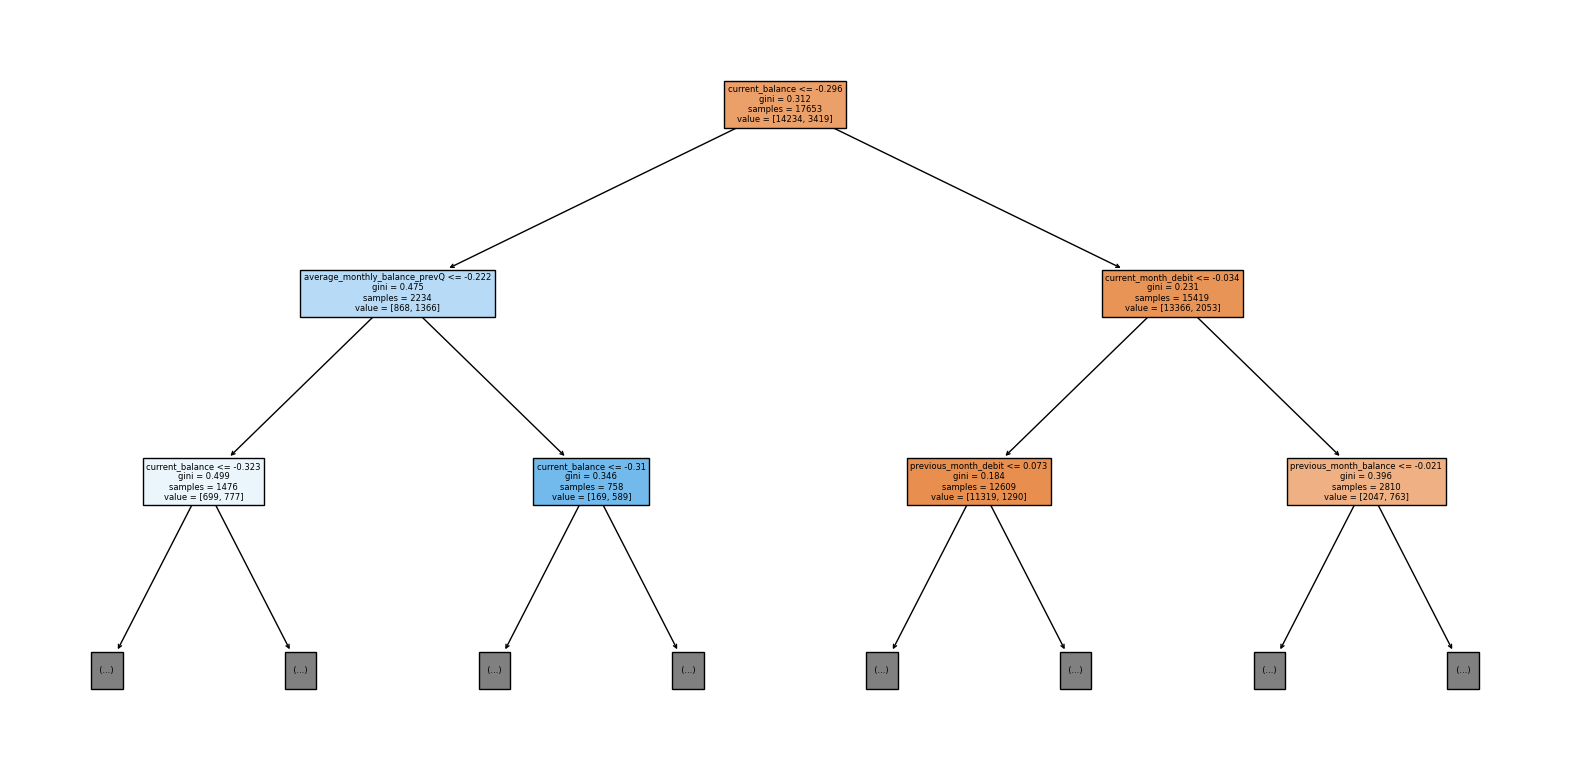

In [16]:
# This graph is useless. Refer above diagram.
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(20,10), dpi = 100)
plot_tree(classifier, feature_names = X.columns, max_depth = 2, filled = True);

### Question. How to prevent decision tree  from overfitting ?
> * Decision trees are non-parametric models that keeps on learning from data unless there is nothing left to learn.
> * Therefore there are no parameters that we can control to prevent the decision tree from overfitting.

> * What else can we do ?
> * So decision tree has some features that we already know such as __leaf-node, splits, depth__ etc.
> * These physical factors we can __tune__ to prevent tree from overfitting the data.

### Pruning
As tuning these physical characteristics prevents the tree from growing, and learing every single data point this process is often reffered as prunning of the decision tree.

# Hyperparameter Tuning

In [17]:
classifier = DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

## Note :
1. There are quiet a parameters that we can adjust but I'm only be focusing on the important ones. 
2. For the sake of simplicity I'm defining 2 functions ``cal_score`` & ``effect`` respectively.
3. These two can handle quiet everything/parameters.
4. Check below steps and analyze. 

In [18]:
from sklearn.metrics import f1_score

def cal_score(model, x1, y1, x2, y2):
    '''
    model = decision tree classifier
    x1, y1 = from training dataset
    x2, y2 = from test dataset
    '''
    model.fit(x1, y1)
    
    # below predicting values for both training and test sets.
    predict = model.predict(x1)
    f1 = f1_score(y1, predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    
    return f1, f2

In [19]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (12, 7), dpi = 80)
    plt.plot(x_axis, train_score, color = 'violet', label = 'train_score')
    plt.plot(x_axis, test_score, color = 'skyblue', label = 'test_score')
    plt.grid(True)
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.show()

# max_depth parameter.

In [20]:
maxdepth = [i for i in range(1, 50)]
train = []
test = []

for i in maxdepth:
    model = DTC(class_weight = 'balanced', max_depth = i, random_state = 42)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

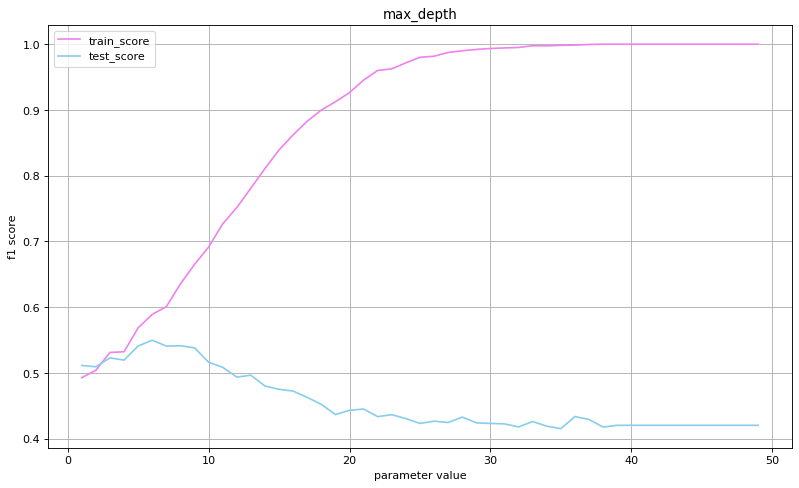

In [21]:
effect(train, test, range(1,50) , 'max_depth')

### Insights :
1. Above graphs shows that as __max depth__ of the decision tree increases the perfomance of the model over training data set increases significantly.
2. On the other hand as the max depth increases; after a very certain point, perfomance of the model over test data set __decreases__ rapidly.

### Reason :
This is due to the fact, the tree starts to overfit the training set. Therefore is not able to generalize over the unseen points over the test set.

# min_sample_split 
The minimum required number of observations in any given node in order to split it.

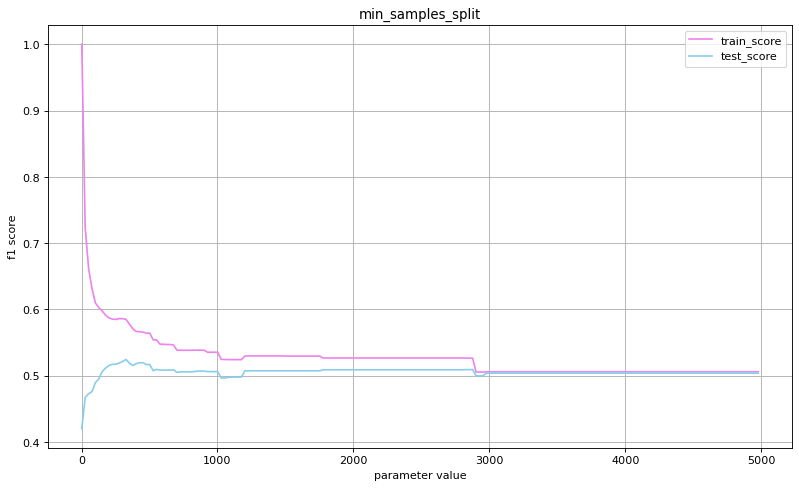

In [22]:
min_samples = [i for i in range(2, 5000, 25)]
train = []
test = []

for i in min_samples :
    model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

    
effect(train, test, range(2,5000, 25) , 'min_samples_split')

### Insights :
1. For the small value of paramter, there is significant difference between train & test scores.
2. As the parameter increases, the difference between them dicreases.

3. When the parameter values increases too much there's a overall dip in both of the scores, this is due to the fact that minimum requirement of splitting a node was so high that there were __No significant splits observed__. As result tree starts to underfit.

# max_leaf_nodes

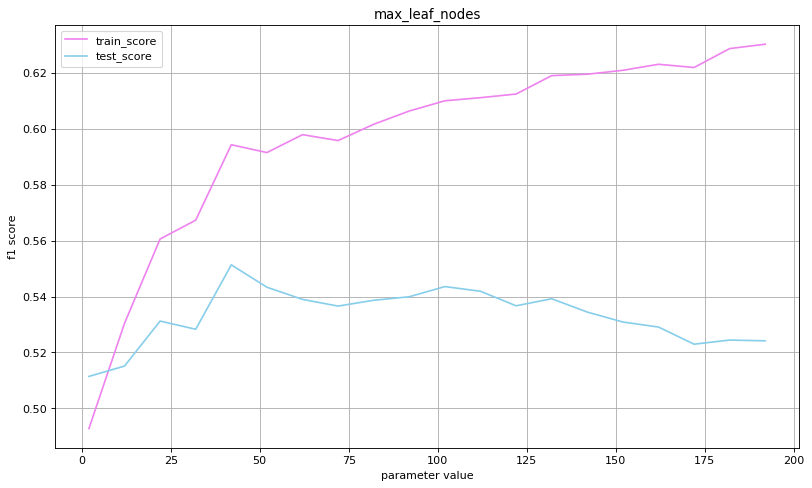

In [23]:
maxleafnodes = [i for i in range(2,200,10)]
train = []
test = []

for i in maxleafnodes:  
  model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 42)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)
    

effect(train, test, range(2,200,10) , 'max_leaf_nodes')

### Insights :
1. As the parameter value goes beyond 25, tree starts overfit.

# min_samples_leaf

In [ ]:
minsamplesleaf = [i for i in range(2,4000,25)]
train = []
test = []

for i in minsamplesleaf:  
  model = DTC(class_weight = 'balanced', min_samples_leaf = i, random_state = 42)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)
    
    
effect(train, test, range(2,4000,25) , 'min_samples_leaf')

### Insights :
1. Crealy model in underfit.

### Question. Which parameter should tune first ?
> 1. max_depth parameter prevents trees from growing at a __macro__ level.
> 2. Rest of the 3 parameters tend to work on __micro__ level, allowing you fine-tune the model at the very grannual level.

> * So the good practice would be start with max_depth parameter. Ideally look for the depth where the tree just starts to overfit the data.
> * Once this is done then fine tune rest 3 parameters. i.e  min_sample_split, max_leaf_nodes, min_samples_leaf.
> * Choose the decision tree that generalizes well. i.e __Higher__ f1 score for test data & performance on test data and train data is similar(almost).

# Feature Importance.

In [ ]:
model = DTC(max_depth = 9)
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()

In [ ]:
plt.figure(figsize=(12,6), dpi=100)
plt.barh(k.index, k, color = 'orchid')
plt.xlabel('Importance')
plt.ylabel('Feature names')
plt.title('Important features')
plt.show()

In [ ]:
X.shape[1]

## Questions :
> 1. To reduce the overfitting of the dicision tree model what can we do ?
> * Increase minimum sample leaf value
> * Decrease the depth of the tree
> * Increase the value of minimum samples to split

> 2. To reduce the underfitting of a decision tree, which method we can use ?
> * Increase the depth of the trees.